# Mini Project 1
## Predicting Vehicle MPG

In [136]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Auto MPG Data Set
Data Set Characteristics: Multivariate

Attribute Characteristics: Categorical, Real

Number of Attributes: 9 including class attribute

Number of Instances: 398

Area: N/A

Date Donated: 1993-07-07

Associated Tasks: Regression

Missing Values?: Yes

## Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  REMOVED continuous
    7. model year:    multi-valued discrete
    8. origin:        REMOVED multi-valued discrete
    9. car name:      REMOVED (from csv)string (unique for each instance)

In [137]:
import pandas as pd

def load_mpg_data():
    csv_path = os.path.join('Data', 'auto-mpg.csv')
    return pd.read_csv(csv_path)

In [138]:
mpg = load_mpg_data()
# Removed values that show no correlation
#del mpg['acceleration'] 
del mpg['origin']
del mpg['car_name']
mpg.head()
#data = np.loadtxt(os.path.join('Data', 'auto-mpg.csv'),
 #                 delimiter=',',usecols=[0,1,2,3,4,5,6,7],
 #                skiprows=1)
#names = ['cylinders', 'displacement','horsepower','weight','model year']
#print(data)
# Remove columns 7 and 5, for origin and acceleration values
#data = np.delete(data, 7, 1)
#data = np.delete(data, 5, 1)

# Split data into X for attribues and y for label
#X,y = data[:, 1:], data[:,0]
#print(X)
#print(y)
#m = y.size

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [139]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.6 KB


In [140]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


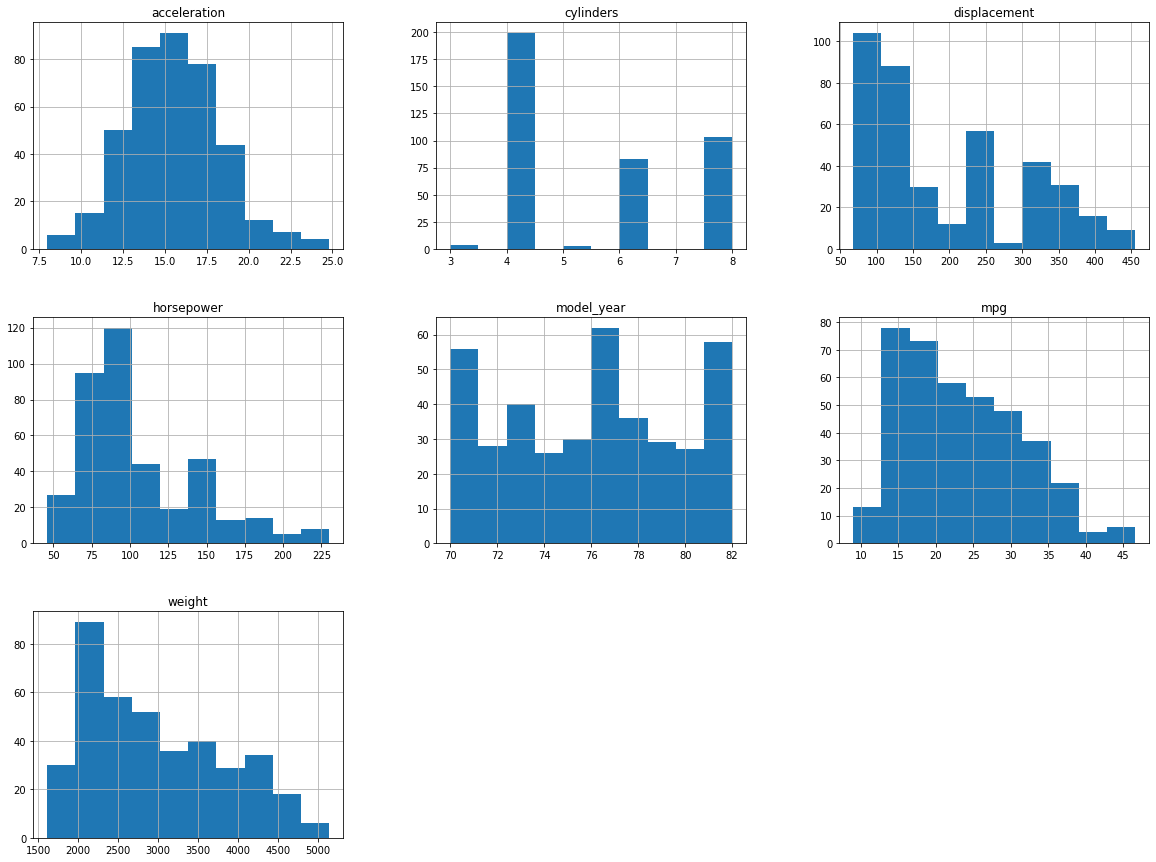

In [141]:
mpg.hist(figsize=(20,15))
plt.show()

In [142]:
#def split_train_test(data, test_ratio):
#    shuffled_indices = np.random.permutation(len(data))
#   test_set_size = int(len(data) * test_ratio)
#    test_indices = shuffled_indices[:test_set_size]
#    train_indices = shuffled_indices[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

In [143]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(mpg, test_size=0.2, random_state=42)
print(len(train_set), "train + ", len(test_set), "test")

313 train +  79 test


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97222d610>,
      dtype=object)

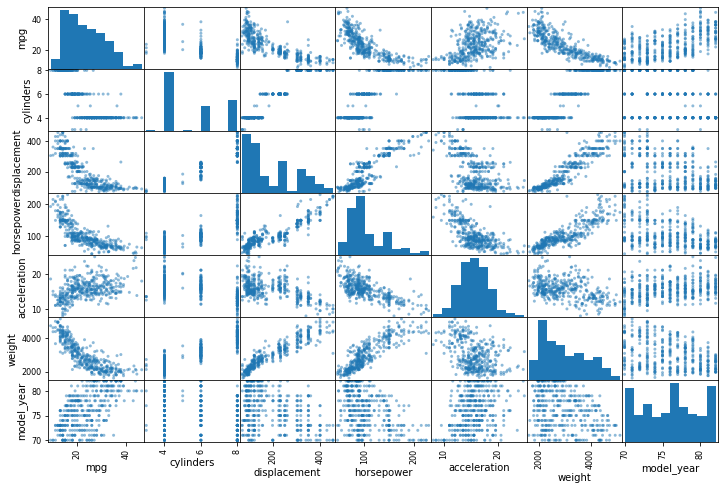

In [144]:
# Plot every attribute against every other attribute
# THIS WILL MAKE A LOT OF GRAPHS
from pandas.plotting import scatter_matrix
attributes = ['mpg','cylinders', 'displacement','horsepower','acceleration','weight','model_year']
scatter_matrix(mpg[attributes], figsize=(12,8))

In [145]:
# Remove labels from training set and put them in their own array 
mpg_training_X = train_set.drop("mpg",axis=1)
mpg_training_Y = train_set['mpg'].copy()
#print(mpg_X)
#print(mpg_Y)

In [146]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [147]:
# Feature Scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
mpg_training_X_prepared = num_pipeline.fit_transform(mpg_training_X)
#print(mpg_X_prepared)

In [148]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [149]:
# Build the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(mpg_training_X_prepared, mpg_training_Y)

lin_scores = cross_val_score(lin_reg, mpg_training_X_prepared, mpg_training_Y, scoring = "neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.71839943 3.66840221 3.90064728 3.52100888 4.81082863 4.02171437
 3.10650858 3.40968156 2.96676951 2.96693692]
Mean: 3.5090897372195267
Standard Deviation: 0.5934082603750016


In [150]:
# Build DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(mpg_training_X_prepared, mpg_training_Y)

tree_scores = cross_val_score(tree_reg, mpg_training_X_prepared,mpg_training_Y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [2.85492995 4.49652644 2.35690475 3.86785762 3.94563867 4.23369739
 3.01544412 3.65389761 3.73756001 3.85812925]
Mean: 3.6020585796556404
Standard Deviation: 0.626664394171824


In [151]:
# Build RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(mpg_training_X_prepared, mpg_training_Y)

forest_scores = cross_val_score(forest_reg, mpg_training_X_prepared, mpg_training_Y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.89444457 3.32421123 1.91332608 4.0411898  3.60635793 3.24824496
 2.19945255 2.09668466 2.4769086  2.85165329]
Mean: 2.8652473668597036
Standard Deviation: 0.6619207095230248


In [152]:
# Compute the root mean squared error
from sklearn.metrics import mean_squared_error
#mpg_predictions = lin_reg.predict(mpg_training_X_prepared)
#lin_mse = mean_squared_error(mpg_training_Y, mpg_predictions)
#lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)

In [153]:
# Show some predicted data
#some_data = mpg_training_X.iloc[:5]
#some_labels = mpg_training_Y.iloc[:5]
#some_data_prepared = num_pipeline.fit_transform(some_data)
#print("Predictions:", lin_reg.predict(some_data_prepared))
#print("Labels:", list(some_labels))

In [154]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')

grid_search.fit(mpg_training_X_prepared, mpg_training_Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [155]:
grid_search.best_params_
#cvres = grid_search.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

{'max_features': 6, 'n_estimators': 30}

In [156]:
#feature_importances = grid_search.best_estimator_.feature_importances_
#feature_importances

In [157]:
# Final Predictions
final_model = grid_search.best_estimator_

mpg_test_X = test_set.drop('mpg',axis =1)
mpg_test_Y = test_set['mpg'].copy()

mpg_test_X_prepared = num_pipeline.fit_transform(mpg_test_X)

final_predictions = final_model.predict(mpg_test_X_prepared)

final_mse = mean_squared_error(mpg_test_Y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.898256593175884